# Import Libaraies

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,confusion_matrix,make_scorer,classification_report,roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import tree
import graphviz
from pdpbox import pdp, get_dataset, info_plots
import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve


from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')

random_state=42
np.random.seed(random_state)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


ModuleNotFoundError: ignored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Load Data

In [0]:
#importing the train dataset
train_df=pd.read_csv('train.csv')
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
#Shape of the train dataset
train_df.shape

(200000, 202)

In [0]:
#Summary of the dataset
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [0]:
#target classes count
target_class=train_df['target'].value_counts()
print('Count of target classes :\n',target_class)
#Percentage of target classes count
per_target_class=train_df['target'].value_counts()/len(train_df)*100
print('percentage of count of target classes :\n',per_target_class)


Count of target classes :
 0    179902
1     20098
Name: target, dtype: int64
percentage of count of target classes :
 0    89.951
1    10.049
Name: target, dtype: float64


In [0]:
#Distribution of train attributes
def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in train_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

<Figure size 432x288 with 0 Axes>

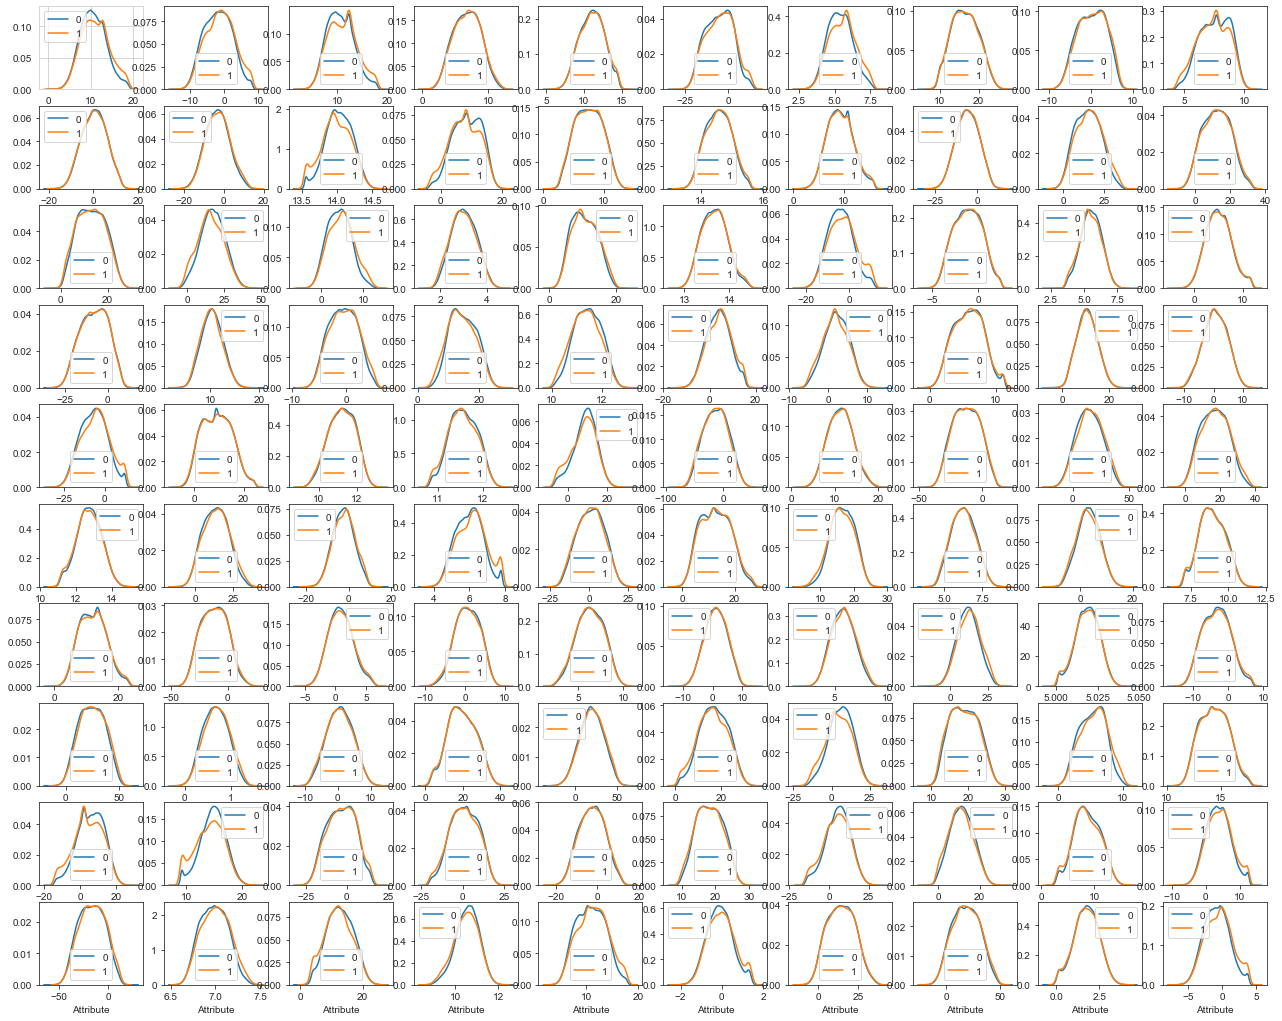

In [0]:
#corresponding to negative class
t0=train_df[train_df.target.values==0]
#corresponding to positive class
t1=train_df[train_df.target.values==1]
#train attributes from 2 to 102
train_attributes=train_df.columns.values[2:102]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

<Figure size 432x288 with 0 Axes>

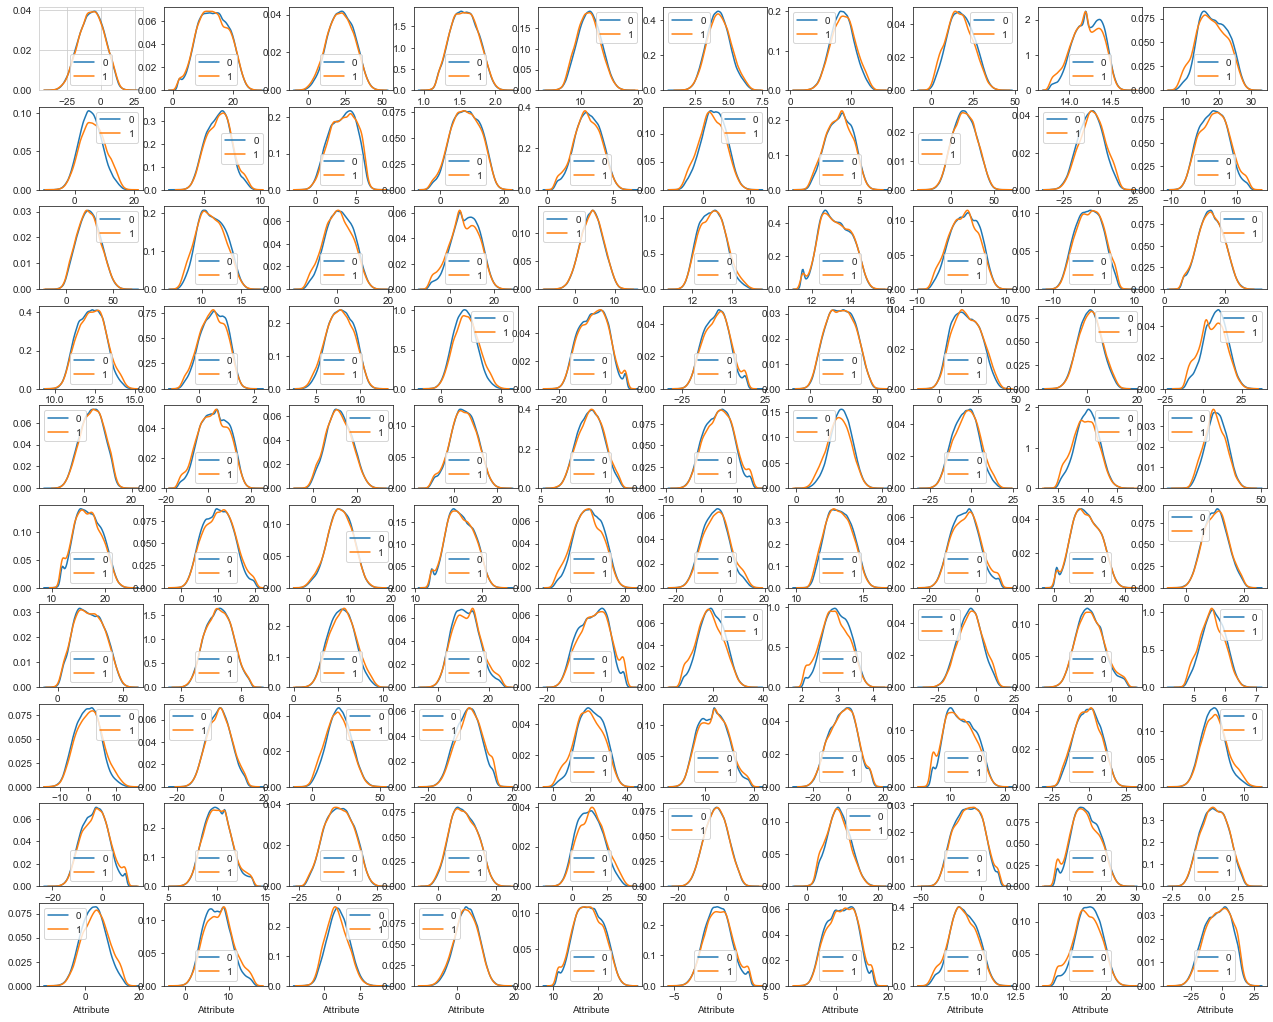

In [0]:
#train attributes from 102 to 203
train_attributes=train_df.columns.values[102:203]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

In [0]:
#importing the test dataset
test_df=pd.read_csv('test.csv')
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [0]:
#Shape of the test dataset
test_df.shape

(200000, 201)

In [0]:
#Distribution of test attributes
def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(test_df[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

In [0]:
#test attribiutes from 1 to 101
#test_attributes=test_df.columns.values[1:101]
#plot distribution of test attributes
#plot_test_attribute_distribution(test_attributes)

In [0]:
#test_attributes=test_df.columns.values[101:202]
#plot the distribution of test attributes
#plot_test_attribute_distribution(test_attributes)

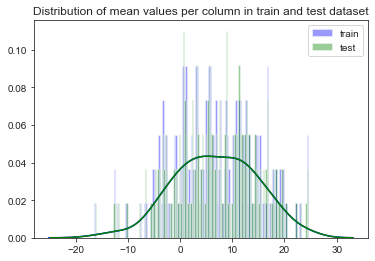

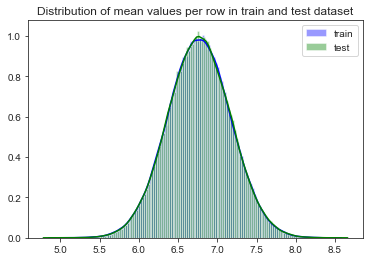

In [0]:
#Distribution of mean values per column in train and test dataset
#plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for mean values per column in train attributes
sns.distplot(train_df[train_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per column in test attributes
sns.distplot(test_df[test_attributes].mean(axis=0),color='green',kde=True,bins=150,label='test')
plt.title('Distribution of mean values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of mean values per row in train and test dataset
#plt.figure(figsize=(16,8))
#Distribution plot for mean values per row in train attributes
sns.distplot(train_df[train_attributes].mean(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per row in test attributes
sns.distplot(test_df[test_attributes].mean(axis=1),color='green',kde=True, bins=150, label='test')
plt.title('Distribution of mean values per row in train and test dataset')
plt.legend()
plt.show()

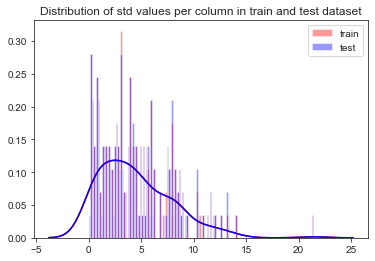

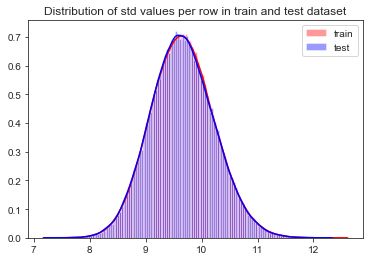

In [0]:
#Distribution of std values per column in train and test dataset
#plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for std values per column in train attributes
sns.distplot(train_df[train_attributes].std(axis=0),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per column in test attributes
sns.distplot(test_df[test_attributes].std(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of std values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of std values per row in train and test dataset
#plt.figure(figsize=(16,8))
#Distribution plot for std values per row in train attributes
sns.distplot(train_df[train_attributes].std(axis=1),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per row in test attributes
sns.distplot(test_df[test_attributes].std(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of std values per row in train and test dataset')
plt.legend()
plt.show()

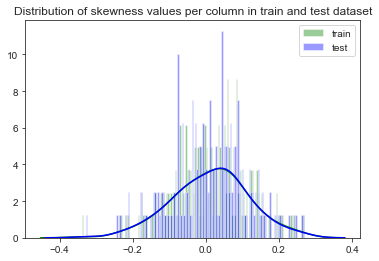

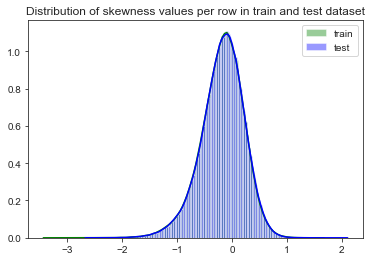

In [0]:
#Distribution of skew values per column in train and test dataset
#plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for skew values per column in train attributes
sns.distplot(train_df[train_attributes].skew(axis=0),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per column in test attributes
sns.distplot(test_df[test_attributes].skew(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of skewness values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of skew values per row in train and test dataset
#plt.figure(figsize=(16,8))
#Distribution plot for skew values per row in train attributes
sns.distplot(train_df[train_attributes].skew(axis=1),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per row in test attributes
sns.distplot(test_df[test_attributes].skew(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of skewness values per row in train and test dataset')
plt.legend()
plt.show()


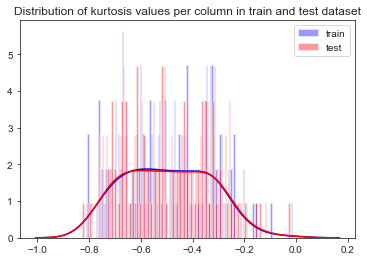

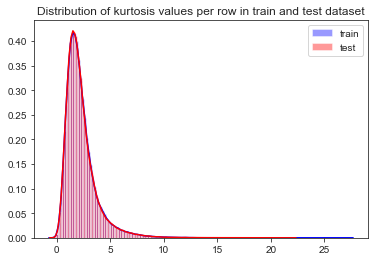

In [0]:
#Distribution of kurtosis values per column in train and test dataset
#plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for kurtosis values per column in train attributes
sns.distplot(train_df[train_attributes].kurtosis(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per column in test attributes
sns.distplot(test_df[test_attributes].kurtosis(axis=0),color='red',kde=True,bins=150,label='test')
plt.title('Distribution of kurtosis values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of kutosis values per row in train and test dataset
#plt.figure(figsize=(16,8))
#Distribution plot for kurtosis values per row in train attributes
sns.distplot(train_df[train_attributes].kurtosis(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per row in test attributes
sns.distplot(test_df[test_attributes].kurtosis(axis=1),color='red',kde=True, bins=150, label='test')
plt.title('Distribution of kurtosis values per row in train and test dataset')
plt.legend()
plt.show()

In [0]:
#Finding the missing values in train and test data
train_missing=train_df.isnull().sum().sum()
test_missing=test_df.isnull().sum().sum()
print('Missing values in train data :',train_missing)
print('Missing values in test data :',test_missing)

Missing values in train data : 0
Missing values in test data : 0


In [0]:
#Correlations in train attributes
train_attributes=train_df.columns.values[2:202]
train_correlations=train_df[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
train_correlations=train_correlations[train_correlations['level_0']!=train_correlations['level_1']]
print(train_correlations.head(10))
print(train_correlations.tail(10))

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844


In [0]:
#Correlations in test attributes
test_attributes=test_df.columns.values[1:201]
test_correlations=test_df[test_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
test_correlations=test_correlations[test_correlations['level_0']!=test_correlations['level_1']]
print(test_correlations.head(10))
print(test_correlations.tail(10))


   level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_188  var_113  1.639749e-07
3  var_113  var_188  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06
       level_0  level_1         0
39790  var_122  var_164  0.008513
39791  var_164  var_122  0.008513
39792  var_164    var_2  0.008614
39793    var_2  var_164  0.008614
39794   var_31  var_132  0.008714
39795  var_132   var_31  0.008714
39796   var_96  var_143  0.008829
39797  var_143   var_96  0.008829
39798  var_139   var_75  0.009868
39799   var_75  var_139  0.009868


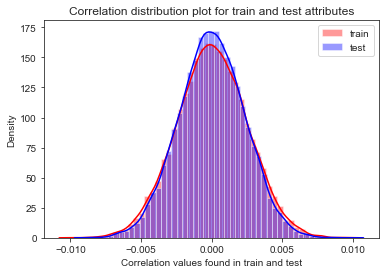

In [0]:
#Correlations in train data
train_correlations=train_df[train_attributes].corr()
train_correlations=train_correlations.values.flatten()
train_correlations=train_correlations[train_correlations!=1]
#Correlations in test data
test_correlations=test_df[test_attributes].corr()
test_correlations=test_correlations.values.flatten()
test_correlations=test_correlations[test_correlations!=1]

#plt.figure(figsize=(20,5))
#Distribution plot for correlations in train data
sns.distplot(train_correlations, color="Red", label="train")
#Distribution plot for correlations in test data
sns.distplot(test_correlations, color="Blue", label="test")
plt.xlabel("Correlation values found in train and test")
plt.ylabel("Density")
plt.title("Correlation distribution plot for train and test attributes")
plt.legend()

In [0]:
#Feature engineering
#Permutation variable importance measure in a random forest for classification and regression.
X=train_df.drop(columns=['ID_code','target'],axis=1)
test=test_df.drop(columns=['ID_code'],axis=1)
y=train_df['target']

In [0]:
#build simple model to find features which are more important
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42)

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)


Shape of X_train : (150000, 200)
Shape of X_valid : (50000, 200)
Shape of y_train : (150000,)
Shape of y_valid : (50000,)


In [0]:
#Random forest classifier
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)
#fitting the model
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
#calculate weights and show important features using eli5 library
#Permutation importance
from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(rf_model,random_state=42)
#fitting the model
perm_imp.fit(X_valid,y_valid)


PermutationImportance(cv='prefit',
           estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
           n_iter=5, random_state=42, refit=True, scoring=None)

In [0]:
#Important features
eli5.show_weights(perm_imp,feature_names=X_valid.columns.tolist(),top=200)

Weight,Feature
0.0004 ± 0.0002,var_81
0.0003 ± 0.0002,var_146
0.0003 ± 0.0002,var_109
0.0003 ± 0.0002,var_12
0.0002 ± 0.0001,var_110
0.0002 ± 0.0000,var_173
0.0002 ± 0.0001,var_174
0.0002 ± 0.0002,var_0
0.0002 ± 0.0002,var_26
0.0001 ± 0.0001,var_166


In [0]:
#Split the train data using StratefiedKFold cross validator
#Training data
X=train_df.drop(['ID_code','target'],axis=1)
Y=train_df['target']
#StratifiedKFold cross validator
cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True) #SPLITS=5
for train_index,valid_index in cv.split(X,Y):
    X_train, X_valid=X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid=Y.iloc[train_index], Y.iloc[valid_index]

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (160001, 200)
Shape of X_valid : (39999, 200)
Shape of y_train : (160001,)
Shape of y_valid : (39999,)


# Classifier Modules

In [0]:
# Importing Classifier Modules
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
# Parameter Tuning
from sklearn.model_selection import GridSearchCV

# Linear SVM

In [0]:
# Linear SVM
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
linear_svc = LinearSVC(dual=False)
scores = cross_val_score(linear_svc, X_train, y_train, cv=3, scoring = "accuracy")
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_valid)
precision_linear_svc = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
recall_linear_svc = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
accuracy_linear_svc = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
f1score_linear_svc = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
ROC_linear_svc = round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2)
print('Linear SVM : ')
print("Linear SVM Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("Linear SVM Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("Linear SVM Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("Linear SVM F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("Linear SVM ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

Linear SVM : 
Linear SVM Precision: 78.72
Linear SVM Recall: 16.84
Linear SVM Accuracy: 91.02
Linear SVM F1_score: 27.74
Linear SVM ROC: 58.16


# Polynomial SVM

In [0]:
# Polynomial SVM
#from sklearn import svm
#poly_svc = svm.SVC(kernel='poly', degree=3, coef0=1, C=5, gamma="auto")
#scores = cross_val_score(poly_svc, X_train, y_train, cv=3, scoring="accuracy")
#poly_svc.fit(X_train, y_train)
#Y_pred = poly_svc.predict(X_valid)
#precision_poly_svc = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
#recall_poly_svc = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
#accuracy_poly_svc = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
#f1score_poly_svc = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
#ROC_poly_svc = round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2)
#print('polynomial SVM :')
#print("polynomial SVM Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
#print("polynomial SVM Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
#print("polynomial SVM Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
#print("polynomial SVM F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
#print("polynomial SVM ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

#SVM poly
params_poly_svm = [{'C': [0.1, 1, 10, 100], 'kernel': ['poly'],
                'degree': [1, 2, 3],
                'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}]
grid_poly_svm = GridSearchCV(estimator = SVC(random_state = 0),
                         param_grid = params_poly_svm,
                         scoring = 'accuracy',
                         cv = 10,
                         n_jobs=-1)
grid_poly_svm = grid_poly_svm.fit(X_train, y_train) 
Y_pred = grid_poly_svm .predict(X_valid)
best_params_poly_svm = grid_poly_svm.best_params_
print(best_params_poly_svm)
acc_poly_svm = round (metrics.accuracy_score(y_valid, Y_pred) *100, 2)
Precision_poly_svm = round (metrics.precision_score(y_valid, Y_pred) *100, 2)
Recall_poly_svm = round (metrics.recall_score(y_valid, Y_pred) *100, 2)
F1_poly_svm = round (metrics.f1_score(y_valid, Y_pred) *100, 2)
ROC_poly_svm = round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2)
print("poly SVM accuracy score = {}".format(acc_poly_svm))
print("poly SVM Precision score = {}".format(Precision_poly_svm))
print("poly SVM Recall score = {}".format(Recall_poly_svm))
print("poly SVM F1 score = {}".format(F1_poly_svm))
print("poly SVM ROC = {}".format(ROC_poly_svm))



# RBF SVM

In [0]:
# RBF SVM
from sklearn import svm
rbf_svc = svm.SVC(kernel='rbf', C=10.0, gamma=0.1)
scores = cross_val_score(rbf_svc, X_train, y_train, cv=3, scoring="accuracy")
rbf_svc.fit(X_train, y_train)
Y_pred = rbf_svc.predict(X_valid)
precision_rbf_svc = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
recall_rbf_svc = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
accuracy_rbf_svc = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
f1score_rbf_svc = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
ROC_rbf_svc = round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2)
print('RBF SVM : ')
print("RBF SVM Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("RBF SVM Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("RBF SVM Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("RBF SVM F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("RBF SVM ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

# Naive Bayes

In [0]:
# Naive Bayes
gaussian = GaussianNB()
scores = cross_val_score(gaussian, X_train, y_train, cv=3, scoring="accuracy")
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_valid)
precision_gaussian = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
recall_gaussian = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
accuracy_gaussian = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
f1score_gaussian = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
print('NB : ')
print("Naive Bayes Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("Naive Bayes Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("Naive Bayes Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("Naive Bayes F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("Naive Bayes ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

NB : 
Precision: 71.68
Recall: 36.74
Accuracy: 92.04
f1 score: 48.58
ROC: 67.54


# Logistic Regression

In [0]:
# Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
scores = cross_val_score(logreg, X_train, y_train, cv=3, scoring="accuracy")
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_valid)
precision_logreg = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
recall_logreg = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
accuracy_logreg = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
f1score_logreg = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
ROC_logreg = round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2)
print('Logistic Regression : ')
print("Logistic Regression Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("Logistic Regression Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("Logistic Regression Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("Logistic Regression F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("Logistic Regression ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

Logistic Regression : 
Logistic Regression Precision: 67.33
Logistic Regression Recall: 23.11
Logistic Regression Accuracy: 90.98
Logistic Regression F1_score: 34.4
Logistic Regression ROC: 60.91


# Decision Tree 1 "Gini"

In [0]:
# Decision Tree 1
# Gini
decision_tree = DecisionTreeClassifier()
scores = cross_val_score(decision_tree, X_train, y_train, cv=3, scoring="accuracy")
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_valid)
precision_tree_gini = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
recall_tree_gini = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
accuracy_tree_gini = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
f1score_tree_gini = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
ROC_tree_gini = round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2)
print('Desision tree with Gini : ')
print("Decision Tree Gini Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("Decision Tree Gini Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("Decision Tree Gini Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("Decision Tree Gini F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("Decision Tree Gini ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

Desision tree with Gini : 
Decision Tree Gini Precision: 20.45
Decision Tree Gini Recall: 21.52
Decision Tree Gini Accuracy: 83.39
Decision Tree Gini F1_score: 20.97
Decision Tree Gini ROC: 55.99


# Decision Tree 2 "Entropy"

In [0]:
# Decision Tree 2
#entropy
decision_tree_ent = DecisionTreeClassifier(criterion="entropy")
scores = cross_val_score(decision_tree_ent, X_train, y_train, cv=3, scoring="accuracy")
decision_tree_ent.fit(X_train, y_train)
Y_pred = decision_tree_ent.predict(X_valid)
precision_tree_ent = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
recall_tree_ent = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
accuracy_tree_ent = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
f1score_tree_ent = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
ROC_tree_ent = round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2)
print('Desision tree with entropy : ')
print("Decision Tree entropy Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("Decision Tree entropy Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("Decision Tree entropy Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("Decision Tree entropyF1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("Decision Tree entropy ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

Desision tree with entropy : 
Decision Tree entropy Precision: 19.33
Decision Tree entropy Recall: 18.96
Decision Tree entropy Accuracy: 83.6
Decision Tree entropyF1_score: 19.15
Decision Tree entropy ROC: 54.97


In [0]:
# Decision Tree 3
#prune
DT_prune= DecisionTreeClassifier(min_impurity_decrease=0.1)
scores = cross_val_score(DT_prune, X_train, y_train, cv=3, scoring="accuracy")
DT_prune.fit(X_train, y_train)
Y_pred = DT_prune.predict(X_valid)
precision_tree_prune = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
recall_tree_prune = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
accuracy_tree_prune = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
f1score_tree_prune = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
ROC_tree_prune = round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2)

print('Desision tree with prune : ')
print("Desision Tree prune Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("Desision Tree prune Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("Desision Tree prune Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("Desision Tree prune F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("Desision Tree prune ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

In [0]:
# Decision Tree 4
#Regression
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
Y_pred = decision_tree_reg.predict(X_valid)
print('Desision Tree with regression : ')
print("Desision Tree regression Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("Desision Tree regression Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("Desision Tree regression Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("Desision Tree regression F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("Desision Tree regression ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

In [0]:
param_grid = {'criterion': ["gini", "entropy"], 'max_features': [2, 4, 6, 8], 'n_estimators': [100, 300, 500], 'max_depth': [2, 4, 5]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)
print("Best Parameters : \n", grid_search.best_params_)

In [0]:
#Random Forest
y_test=y_valid
X_test=X_valid
random_forest = RandomForestClassifier(criterion="gini", max_features=4, n_estimators=100, max_depth=5)
scores = cross_val_score(random_forest, X_train, y_train, cv=3, scoring="accuracy")
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_valid)
precision_random_forest = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
recall_random_forest = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
accuracy_random_forest = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
f1score_random_forest = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
ROC_random_forest = round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2)
print("Random Forest : ")
print("Random Forest Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("Random Forest Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("Random Forest Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("Random Forest F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("Random Forest ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

In [0]:
aram_grid = {'learning_rate': [0.1, 0.25, 0.5], 'n_estimators': [100, 300, 500], 'max_depth': [2, 4, 5]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid)
grid_search.fit(X_train, Y_train)
print("Best Parameters : \n", grid_search.best_params_)

In [0]:
#Gradient Boosting XGB
gbrt = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=100)
scores = cross_val_score(gbrt, X_train, y_train, cv=3, scoring="accuracy")
gbrt.fit(X_train, y_train)
Y_pred = gbrt.predict(X_valid)
precision_gbrt = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
recall_gbrt = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
accuracy_gbrt = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
f1score_gbrt = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
ROC_gbrt = round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2)

print("Gradient Boosting Classifier XGB : ")
print("XGB Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("XGB Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("XGB Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("XGB F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("XGB ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

In [0]:
# BaggingClassifier wiht Desision Tree
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=100, bootstrap=True)
scores = cross_val_score(bag_clf, X_train, Y_train, cv=3, scoring="accuracy")
bag_clf.fit(X_train, Y_train)
y_pred = bag_clf.predict(X_valid)
precision_bag_clf = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
recall_bag_clf = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
accuracy_bag_clf = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
f1score_bag_clf = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
print("BaggingClassifier wiht Desision Tree : ")
print("Bagging wiht DT Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("Bagging wiht DT Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("Bagging wiht DT Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("Bagging wiht DT F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("Bagging wiht DT ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

In [0]:
# BaggingClassifier wiht NB
bag_nb = BaggingClassifier(GaussianNB(), n_estimators=500, max_samples=100, bootstrap=True)
scores = cross_val_score(bag_nb, X_train, Y_train, cv=3, scoring="accuracy")
bag_nb.fit(X_train, Y_train)
Y_pred = bag_nb.predict(X_valid)
precision_bag_nb = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
recall_bag_nb = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
accuracy_bag_nb = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
f1score_bag_nb = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
ROC_bag_nb = round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2)
print("BaggingClassifier with NB : ")
print("Bagging with NB Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("Bagging with NB Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("Bagging with NB Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("Bagging with NB F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("Bagging with NB ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

In [0]:
# Ada Boosting
param_grid = {'learning_rate': [1., 0.1, 0.25, 0.5], 'n_estimators': [50, 100, 300, 500], 'algorithms': ["SAMME", "SAMME.R"]}
grid_search = GridSearchCV(AdaBoostClassifier, param_grid)
grid_search.fit(X_train, Y_train)
print("Best Parameters : \n", grid_search.best_params_)

In [0]:
#AdaBoost
ada = AdaBoostClassifier(algorithm="SAMME", n_estimators=500, learning_rate=1.0)
scores = cross_val_score(ada, X_train, Y_train, cv=3, scoring="accuracy")
ada.fit(X_train, Y_train)
Y_pred = ada.predict(X_valid)
precision_ada = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
recall_ada = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
accuracy_ada = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
f1score_ada = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
ROC_ada = round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2)
print("AdaBoost Ada Boosting : ")
print("AdaBoost Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("AdaBoost Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("AdaBoost Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("AdaBoost F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("AdaBoost ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

In [0]:
# Voting classifier
voting_clf = VotingClassifier(estimators=[('rbf', rbf_svc), ('dt', decision_tree), ('rf', random_forest), ('bd', bag_clf), ('ab', ada)],
                              voting='hard')
scores = cross_val_score(voting_clf, X_train, Y_train, cv=3, scoring="accuracy")
voting_clf.fit(X_train, Y_train)
Y_pred = voting_clf.predict(X_valid)
precision_voting = round(metrics.precision_score(y_valid, Y_pred) * 100, 2)
recall_voting = round(metrics.recall_score(y_valid, Y_pred) * 100, 2)
accuracy_voting = round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2)
f1score_voting = round(metrics.f1_score(y_valid, Y_pred) * 100, 2)
ROC_voting = round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2)
print("Votting Hard : ")
print("Votting Hard Precision:", round(metrics.precision_score(y_valid, Y_pred) * 100, 2))
print("Votting Hard Recall:", round(metrics.recall_score(y_valid, Y_pred) * 100, 2))
print("Votting Hard Accuracy:", round(metrics.accuracy_score(y_valid, Y_pred) * 100, 2))
print("Votting Hard F1_score:", round(metrics.f1_score(y_valid, Y_pred) * 100, 2))
print("Votting Hard ROC:", round (metrics.roc_auc_score(y_valid, Y_pred)* 100, 2))

In [0]:
comparison = pd.DataFrame({
    'Model': ['Linear SVM', 'Poly SVM', 'RBF SVM', 'Naive Bayes', 'Logistic Regression', 'DT with Gini', 'DT with Entropy',
               'Random Forest', 'GD', 'Bagging with DT', 'Bagging with NB', 'Ada Boosting', 'Voting'],
    'Precision': [precision_linear_svc, precision_poly_svc, precision_rbf_svc, precision_gaussian, precision_logreg,
                  precision_tree_gini, precision_tree_ent, precision_random_forest, precision_gbrt,
                  precision_bag_clf, precision_bag_nb, precision_ada, precision_voting],
    'Recall': [recall_linear_svc,  recall_poly_svc, recall_rbf_svc, recall_gaussian, recall_logreg,
                  recall_tree_gini, recall_tree_ent, recall_random_forest, recall_gbrt,
                  recall_bag_clf, recall_bag_nb, recall_ada, recall_voting],
    'F1_score': [f1score_linear_svc,  f1score_poly_svc, f1score_rbf_svc, f1score_gaussian, f1score_logreg,
                  f1score_tree_gini, f1score_tree_ent, f1score_random_forest, f1score_gbrt,
                  f1score_bag_clf, f1score_bag_nb, f1score_ada, f1score_voting],
    'Accuracy': [accuracy_linear_svc,  accuracy_poly_svc, accuracy_rbf_svc, accuracy_gaussian, accuracy_logreg,
                  accuracy_tree_gini, accuracy_tree_ent, accuracy_random_forest, accuracy_gbrt,
                  accuracy_bag_clf, accuracy_bag_nb, accuracy_ada, accuracy_voting],
     'ROC': [ROC_linear_svc,  ROC_poly_svc, ROC_rbf_svc, ROC_gaussian, ROC_logreg,
                  ROC_tree_gini, ROC_tree_ent, ROC_random_forest, ROC_gbrt,
                  ROC_bag_clf, ROC_bag_nb, ROC_ada, ROC_voting]
})
comparison

In [0]:
print(comparison)
comparison.plot(x='Model', kind='bar')
plt.show()

In [0]:
sub_df = pd.DataFrame({"ID_code": ids["ID_code"]})
sub_df["target"] = test_pred
sub_df.to_csv("submission.csv", index=False)